# Data Wrangling with Penguins

#### 🎯 Merge and join multiple tables together

### Load all our data

In [123]:
import pandas as pd
adelie_df = pd.read_csv('data/penguins_adelie.csv')
chinstrap_df = pd.read_csv('data/penguins_chinstrap.csv')
gentoo_df = pd.read_csv('data/penguins_gentoo.csv') 
sex_df = pd.read_csv('data/sex_data_penguins.csv') 

In [124]:
sex_df.head()

,Sex,Sample Number,Species
0,MALE,1,Adelie
1,FEMALE,2,Adelie
2,FEMALE,3,Adelie
3,NaN,4,Adelie
4,MALE,6,Adelie


In [125]:
sex_df[sex_df['Sample Number']==1]

,Sex,Sample Number,Species
0,MALE,1,Adelie
150,FEMALE,1,Chinstrap
216,FEMALE,1,Gentoo


In [126]:
sex_df['Species'].str[0]


0      A
1      A
2      A
3      A
4      A
      ..
332    G
333    G
334    G
335    G
336    G
Name: Species, Length: 337, dtype: object

In [127]:
sex_df['Sample ID'] = sex_df['Species'].str[0] + '_' + sex_df['Sample Number'].astype(str)
sex_df

,Sex,Sample Number,Species,Sample ID
0,MALE,1,Adelie,A_1
1,FEMALE,2,Adelie,A_2
2,FEMALE,3,Adelie,A_3
3,NaN,4,Adelie,A_4
4,MALE,6,Adelie,A_6
...,...,...,...,...
332,NaN,120,Gentoo,G_120
333,FEMALE,121,Gentoo,G_121
334,MALE,122,Gentoo,G_122
335,FEMALE,123,Gentoo,G_123


In [128]:
sex_df.drop(['Sample Number','Species'],axis=1,inplace=True) 
# without inplace true the method does not save the changes. 
# We can (cheat) check that if jupiter prints te result. 
# If it saves it should not print

### Create one joint DataFrame

In [129]:

adelie_df.head()


,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
0,PAL0708,1,Adelie,A_1,Anvers,Torgersen,N1A1,39.1,18.7,181.0,3750.0,Not enough blood for isotopes.
1,PAL0708,2,Adelie,A_2,Anvers,Torgersen,N1A2,39.5,17.4,186.0,3800.0,NaN
2,PAL0708,3,Adelie,A_3,Anvers,Torgersen,N2A1,40.3,18.0,195.0,3250.0,NaN
3,PAL0708,4,Adelie,A_4,Anvers,Torgersen,N2A2,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,A_5,Anvers,Torgersen,N3A1,36.7,19.3,193.0,3450.0,NaN


In [130]:
chinstrap_df.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,NaN
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,NaN
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,NaN
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,NaN
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,NaN


#### 1. Put different species in one DataFrame

In [131]:
#concat needs a list as an input
penguins_df = df = pd.concat([adelie_df,chinstrap_df, gentoo_df])
penguins_df.shape

(344, 12)

In [132]:
#different way!
df = adelie_df.append(chinstrap_df).append(gentoo_df)
df.shape

(344, 12)

#### 2. Combine the sex data with the rest

In [133]:
sex_df.shape

(337, 2)

In [134]:
# How= inner is default: keeps only records exist on both data frames
penguins_df_in = penguins_df.merge(sex_df)
penguins_df_in.shape

(337, 13)

In [135]:
#How = outer: keeps all records
penguins_df_out = penguins_df.merge(sex_df, how= 'outer')
penguins_df_out.shape


(344, 13)

In [136]:
#How = left: keeps all data from left data frame
penguins_df_l = penguins_df.merge(sex_df, how= 'left')
penguins_df_l.shape


(344, 13)

In [137]:
#How = right: keeps all data from left data frame
penguins_df_r = penguins_df.merge(sex_df, how= 'right')
penguins_df_r.shape

(337, 13)

In [138]:
penguins_df.columns

Index(['studyName', 'Sample Number', 'Species', 'Sample ID', 'Region',
       'Island', 'Individual ID', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Comments'],
      dtype='object')

In [139]:
penguins_df.tail()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
119,PAL0910,120,Gentoo,G_120,Anvers,Biscoe,N38A2,NaN,NaN,NaN,NaN,NaN
120,PAL0910,121,Gentoo,G_121,Anvers,Biscoe,N39A1,46.8,14.3,215.0,4850.0,NaN
121,PAL0910,122,Gentoo,G_122,Anvers,Biscoe,N39A2,50.4,15.7,222.0,5750.0,NaN
122,PAL0910,123,Gentoo,G_123,Anvers,Biscoe,N43A1,45.2,14.8,212.0,5200.0,NaN
123,PAL0910,124,Gentoo,G_124,Anvers,Biscoe,N43A2,49.9,16.1,213.0,5400.0,NaN


### Missing values

In [140]:
df = penguins_df_l
df.shape

(344, 13)

In [141]:
df.isnull().sum() #same as df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Sample ID                0
Region                   0
Island                   0
Individual ID            0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Comments               318
Sex                     17
dtype: int64

<AxesSubplot:>

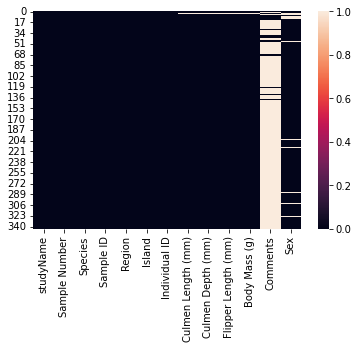

In [142]:
import seaborn as sns
sns.heatmap(df.isnull())


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Sample ID            344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Culmen Length (mm)   342 non-null    float64
 8   Culmen Depth (mm)    342 non-null    float64
 9   Flipper Length (mm)  342 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Comments             26 non-null     object 
 12  Sex                  327 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 37.6+ KB


In [144]:
df.drop(['Comments'],axis=1,inplace=True)
df.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,Adelie,A_1,Anvers,Torgersen,N1A1,39.1,18.7,181.0,3750.0,MALE
1,PAL0708,2,Adelie,A_2,Anvers,Torgersen,N1A2,39.5,17.4,186.0,3800.0,FEMALE
2,PAL0708,3,Adelie,A_3,Anvers,Torgersen,N2A1,40.3,18.0,195.0,3250.0,FEMALE
3,PAL0708,4,Adelie,A_4,Anvers,Torgersen,N2A2,NaN,NaN,NaN,NaN,NaN
4,PAL0708,5,Adelie,A_5,Anvers,Torgersen,N3A1,36.7,19.3,193.0,3450.0,NaN


In [145]:
df['Sex'].fillna('FEMALE',inplace=True)

In [146]:
df.dropna(inplace=True)

### Strange Values

In [147]:
df['Sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [148]:
df['Sex'].value_counts()

FEMALE    176
MALE      165
.           1
Name: Sex, dtype: int64

In [151]:
df['Sex'].replace('.','MALE',inplace=True)
df['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

### Save as .csv for further use

In [150]:
df.to_csv('data/penguins_clean.csv')

In [156]:
#How to create an empty dataFrame
dfe = pd.DataFrame()